# Census Data Exploration 

For this week's assignment, I am going to perform analysis on broadband adoption by household and income level. The source of the data is the 2019 American Community Survey (5-year Estimate).

To start, I will import the python libaries I am likely to use:

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

Next I will import my datasets downloaded from [censusreporter.org](https://censusreporter.org/).

In [2]:
hh_adoption = gpd.read_file('Data/acs2019_5yr_B28002_14000US06037407102.geojson')
income_adoption = gpd.read_file('Data/acs2019_5yr_B28004_14000US06037407102.geojson')

Before starting on any analysis, I will familiarize myself with the datasets. To start I will take a quick look at the shape of the files.

In [3]:
hh_adoption.shape

(2347, 29)

In [4]:
income_adoption.shape

(2347, 53)

Next, I will dig a liitle deeper with the head and tail of the data.

In [5]:
hh_adoption.head()

,geoid,name,B28002001,"B28002001, Error",B28002002,"B28002002, Error",B28002003,"B28002003, Error",B28002004,"B28002004, Error",...,"B28002009, Error",B28002010,"B28002010, Error",B28002011,"B28002011, Error",B28002012,"B28002012, Error",B28002013,"B28002013, Error",geometry
0,05000US06037,"Los Angeles County, CA",3316795.0,5782.0,2803857.0,9287.0,9210.0,704.0,2794647.0,9265.0,...,3095.0,26129.0,1113.0,5345.0,564.0,96302.0,2202.0,416636.0,5107.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,1223.0,130.0,0.0,12.0,1223.0,130.0,...,61.0,21.0,28.0,0.0,12.0,95.0,67.0,257.0,94.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,1095.0,100.0,12.0,20.0,1083.0,99.0,...,64.0,0.0,12.0,0.0,12.0,90.0,72.0,127.0,70.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,1687.0,179.0,0.0,17.0,1687.0,179.0,...,99.0,33.0,51.0,0.0,17.0,72.0,64.0,538.0,176.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,1017.0,99.0,0.0,12.0,1017.0,99.0,...,48.0,0.0,12.0,0.0,12.0,59.0,40.0,281.0,87.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [6]:
income_adoption.head()

,geoid,name,B28004001,"B28004001, Error",B28004002,"B28004002, Error",B28004003,"B28004003, Error",B28004004,"B28004004, Error",...,"B28004021, Error",B28004022,"B28004022, Error",B28004023,"B28004023, Error",B28004024,"B28004024, Error",B28004025,"B28004025, Error",geometry
0,05000US06037,"Los Angeles County, CA",3316795.0,5782.0,185622.0,3065.0,713.0,172.0,117395.0,2505.0,...,1825.0,1529409.0,7758.0,3289.0,437.0,1446065.0,8493.0,80055.0,2121.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,86.0,71.0,0.0,12.0,19.0,22.0,...,35.0,702.0,134.0,0.0,12.0,649.0,131.0,53.0,52.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,66.0,52.0,12.0,20.0,39.0,38.0,...,41.0,858.0,117.0,0.0,12.0,777.0,123.0,81.0,70.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,271.0,127.0,0.0,17.0,222.0,114.0,...,17.0,626.0,178.0,0.0,17.0,448.0,126.0,178.0,134.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,85.0,53.0,0.0,12.0,31.0,38.0,...,17.0,414.0,104.0,0.0,12.0,381.0,100.0,33.0,33.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [7]:
hh_adoption.tail()

,geoid,name,B28002001,"B28002001, Error",B28002002,"B28002002, Error",B28002003,"B28002003, Error",B28002004,"B28002004, Error",...,"B28002009, Error",B28002010,"B28002010, Error",B28002011,"B28002011, Error",B28002012,"B28002012, Error",B28002013,"B28002013, Error",geometry
2342,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,24.0,27.0,0.0,12.0,24.0,27.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
2343,14000US06037980033,"Census Tract 9800.33, Los Angeles, CA",16.0,23.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,16.0,23.0,"MULTIPOLYGON (((-118.24897 33.75590, -118.2470..."
2344,14000US06037990100,"Census Tract 9901, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.95114 33.99643, -118.9505..."
2345,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
2346,14000US06037990300,"Census Tract 9903, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.47656 33.75038, -118.4661..."


In [8]:
income_adoption.tail()

,geoid,name,B28004001,"B28004001, Error",B28004002,"B28004002, Error",B28004003,"B28004003, Error",B28004004,"B28004004, Error",...,"B28004021, Error",B28004022,"B28004022, Error",B28004023,"B28004023, Error",B28004024,"B28004024, Error",B28004025,"B28004025, Error",geometry
2342,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,9.0,7.0,0.0,12.0,9.0,7.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
2343,14000US06037980033,"Census Tract 9800.33, Los Angeles, CA",16.0,23.0,16.0,23.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.24897 33.75590, -118.2470..."
2344,14000US06037990100,"Census Tract 9901, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.95114 33.99643, -118.9505..."
2345,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
2346,14000US06037990300,"Census Tract 9903, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.47656 33.75038, -118.4661..."


Since Census explorer provides us with a total for the entire county, this data point is different in scale from all the others and must be removed for a more accurate analysis.

In [9]:
hh_adoption=hh_adoption.drop([0])
income_adoption=income_adoption.drop([0])

To confirm that the total for the county has been deleted, will run the head command again for both datasets.

In [10]:
hh_adoption.head(5)
income_adoption.head(5)

,geoid,name,B28004001,"B28004001, Error",B28004002,"B28004002, Error",B28004003,"B28004003, Error",B28004004,"B28004004, Error",...,"B28004021, Error",B28004022,"B28004022, Error",B28004023,"B28004023, Error",B28004024,"B28004024, Error",B28004025,"B28004025, Error",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,86.0,71.0,0.0,12.0,19.0,22.0,...,35.0,702.0,134.0,0.0,12.0,649.0,131.0,53.0,52.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,66.0,52.0,12.0,20.0,39.0,38.0,...,41.0,858.0,117.0,0.0,12.0,777.0,123.0,81.0,70.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,271.0,127.0,0.0,17.0,222.0,114.0,...,17.0,626.0,178.0,0.0,17.0,448.0,126.0,178.0,134.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,85.0,53.0,0.0,12.0,31.0,38.0,...,17.0,414.0,104.0,0.0,12.0,381.0,100.0,33.0,33.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,93.0,78.0,50.0,0.0,12.0,35.0,27.0,...,51.0,791.0,116.0,18.0,21.0,748.0,109.0,25.0,22.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Now I will create a quick plot to begin to understand the data in a spatial context.

<AxesSubplot:>

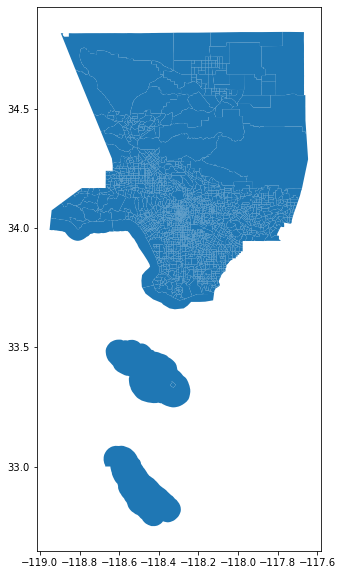

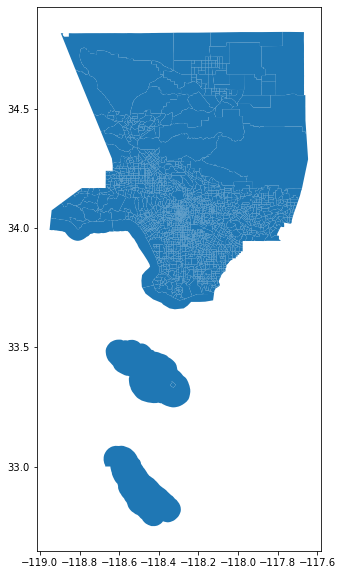

In [11]:
hh_adoption.plot(figsize=(10,10))
income_adoption.plot(figsize=(10,10))

Hmmm, these plot don't tell me much besides that the data is at the census tract level. Let's check the data type to further out understanding of the data sets.

In [12]:
hh_adoption.info()
income_adoption.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2346 entries, 1 to 2346
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2346 non-null   object  
 1   name              2346 non-null   object  
 2   B28002001         2346 non-null   float64 
 3   B28002001, Error  2346 non-null   float64 
 4   B28002002         2346 non-null   float64 
 5   B28002002, Error  2346 non-null   float64 
 6   B28002003         2346 non-null   float64 
 7   B28002003, Error  2346 non-null   float64 
 8   B28002004         2346 non-null   float64 
 9   B28002004, Error  2346 non-null   float64 
 10  B28002005         2346 non-null   float64 
 11  B28002005, Error  2346 non-null   float64 
 12  B28002006         2346 non-null   float64 
 13  B28002006, Error  2346 non-null   float64 
 14  B28002007         2346 non-null   float64 
 15  B28002007, Error  2346 non-null   float64 
 16  B28002008       

To begin to simplify and organize the data, I will delete any unnessary columns and redefine the variable. I will start with the House Hold variable then repeat the process with the income variable.

In [13]:
list(hh_adoption)

['geoid',
 'name',
 'B28002001',
 'B28002001, Error',
 'B28002002',
 'B28002002, Error',
 'B28002003',
 'B28002003, Error',
 'B28002004',
 'B28002004, Error',
 'B28002005',
 'B28002005, Error',
 'B28002006',
 'B28002006, Error',
 'B28002007',
 'B28002007, Error',
 'B28002008',
 'B28002008, Error',
 'B28002009',
 'B28002009, Error',
 'B28002010',
 'B28002010, Error',
 'B28002011',
 'B28002011, Error',
 'B28002012',
 'B28002012, Error',
 'B28002013',
 'B28002013, Error',
 'geometry']

In [14]:
hh_columns_to_keep = ['geoid',
                      'name',
                      'B28002001',
                      'B28002002',
                      'B28002003',
                      'B28002004',
                      'B28002005',
                      'B28002006',
                      'B28002007',
                      'B28002008',
                      'B28002009',
                      'B28002010',
                      'B28002011',
                      'B28002012',
                      'B28002013',
                      'geometry']

In [15]:
hh_adoption=hh_adoption[hh_columns_to_keep]

In [16]:
hh_adoption.head(5)

,geoid,name,B28002001,B28002002,B28002003,B28002004,B28002005,B28002006,B28002007,B28002008,B28002009,B28002010,B28002011,B28002012,B28002013,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,1223.0,0.0,1223.0,973.0,97.0,1045.0,218.0,108.0,21.0,0.0,95.0,257.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,1095.0,12.0,1083.0,959.0,113.0,960.0,124.0,97.0,0.0,0.0,90.0,127.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,1687.0,0.0,1687.0,1453.0,113.0,1388.0,182.0,196.0,33.0,0.0,72.0,538.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,1017.0,0.0,1017.0,868.0,142.0,848.0,131.0,44.0,0.0,0.0,59.0,281.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,1185.0,18.0,1167.0,955.0,70.0,1080.0,203.0,100.0,0.0,0.0,99.0,161.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [17]:
#since deleting columns was successful, I will now relabel them to be more functional
hh_adoption.columns=['geoid',
                      'name',
                      'Total',
                      'With an Internet subscription',
                      'Dial-up with no other type of Internet subscription',
                      'Broadband of any type',
                      'Cellular data plan',
                      'Cellular data plan with no other type of Internet subscription',
                      'Broadband such as cable, fiber optic or DSL',
                      'Broadband such as cable, fiber optic or DSL with no other type of Internet subscription',
                      'Satellite Internet service',
                      'Satellite Internet service with no other type of Internet subscription',
                      'Other service with no other type of Internet subscription',
                      'Internet access without a subscription',
                      'No Internet access',
                      'geometry']

In [18]:
#check to see if the column names have changed
hh_adoption.head(5)

,geoid,name,Total,With an Internet subscription,Dial-up with no other type of Internet subscription,Broadband of any type,Cellular data plan,Cellular data plan with no other type of Internet subscription,"Broadband such as cable, fiber optic or DSL","Broadband such as cable, fiber optic or DSL with no other type of Internet subscription",Satellite Internet service,Satellite Internet service with no other type of Internet subscription,Other service with no other type of Internet subscription,Internet access without a subscription,No Internet access,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,1223.0,0.0,1223.0,973.0,97.0,1045.0,218.0,108.0,21.0,0.0,95.0,257.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,1095.0,12.0,1083.0,959.0,113.0,960.0,124.0,97.0,0.0,0.0,90.0,127.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,1687.0,0.0,1687.0,1453.0,113.0,1388.0,182.0,196.0,33.0,0.0,72.0,538.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,1017.0,0.0,1017.0,868.0,142.0,848.0,131.0,44.0,0.0,0.0,59.0,281.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,1185.0,18.0,1167.0,955.0,70.0,1080.0,203.0,100.0,0.0,0.0,99.0,161.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Since we have manipulated the data so much, it is a good practice to confirm the itegrity of the data before conducting any further analyis

In [19]:
#generate a random record
hh_random_tract=hh_adoption.sample()
hh_random_tract

,geoid,name,Total,With an Internet subscription,Dial-up with no other type of Internet subscription,Broadband of any type,Cellular data plan,Cellular data plan with no other type of Internet subscription,"Broadband such as cable, fiber optic or DSL","Broadband such as cable, fiber optic or DSL with no other type of Internet subscription",Satellite Internet service,Satellite Internet service with no other type of Internet subscription,Other service with no other type of Internet subscription,Internet access without a subscription,No Internet access,geometry
1975,14000US06037601700,"Census Tract 6017, Los Angeles, CA",1303.0,1110.0,0.0,1110.0,997.0,279.0,722.0,96.0,132.0,0.0,17.0,23.0,170.0,"MULTIPOLYGON (((-118.35696 33.93393, -118.3569..."


We can confirm the integrity of the data by adding all the level 1 indentations (With an internet subscription + Internet Access without a subscription + No internet access) to match the total column. 
In the example above: 1221+184+502=1907

Now that we have completed the process with the household variable variable, we will follow the same steps for the income variable.

In [20]:
list(income_adoption)

['geoid',
 'name',
 'B28004001',
 'B28004001, Error',
 'B28004002',
 'B28004002, Error',
 'B28004003',
 'B28004003, Error',
 'B28004004',
 'B28004004, Error',
 'B28004005',
 'B28004005, Error',
 'B28004006',
 'B28004006, Error',
 'B28004007',
 'B28004007, Error',
 'B28004008',
 'B28004008, Error',
 'B28004009',
 'B28004009, Error',
 'B28004010',
 'B28004010, Error',
 'B28004011',
 'B28004011, Error',
 'B28004012',
 'B28004012, Error',
 'B28004013',
 'B28004013, Error',
 'B28004014',
 'B28004014, Error',
 'B28004015',
 'B28004015, Error',
 'B28004016',
 'B28004016, Error',
 'B28004017',
 'B28004017, Error',
 'B28004018',
 'B28004018, Error',
 'B28004019',
 'B28004019, Error',
 'B28004020',
 'B28004020, Error',
 'B28004021',
 'B28004021, Error',
 'B28004022',
 'B28004022, Error',
 'B28004023',
 'B28004023, Error',
 'B28004024',
 'B28004024, Error',
 'B28004025',
 'B28004025, Error',
 'geometry']

In [21]:
# generate a new columns to keep variable
income_columns_to_keep=['geoid',
 'name',
 'B28004001',
 'B28004002',
 'B28004003',
 'B28004004',
 'B28004005',
 'B28004006',
 'B28004007',
 'B28004008',
 'B28004009',
 'B28004010',
 'B28004011',
 'B28004012',
 'B28004013',
 'B28004014',
 'B28004015',
 'B28004016',
 'B28004017',
 'B28004018',
 'B28004019',
 'B28004020',
 'B28004021',
 'B28004022',
 'B28004023',
 'B28004024',
 'B28004025',
 'geometry']

In [22]:
#now I will redefine the original variable with only the desired columns
income_adoption=income_adoption[income_columns_to_keep]
#and the check to see if the changes were applied
income_adoption.head(5)

,geoid,name,B28004001,B28004002,B28004003,B28004004,B28004005,B28004006,B28004007,B28004008,...,B28004017,B28004018,B28004019,B28004020,B28004021,B28004022,B28004023,B28004024,B28004025,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,86.0,0.0,19.0,67.0,192.0,0.0,43.0,...,33.0,206.0,0.0,183.0,23.0,702.0,0.0,649.0,53.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,66.0,12.0,39.0,15.0,21.0,0.0,10.0,...,34.0,200.0,0.0,159.0,41.0,858.0,0.0,777.0,81.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,271.0,0.0,222.0,49.0,413.0,0.0,258.0,...,95.0,328.0,0.0,328.0,0.0,626.0,0.0,448.0,178.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,85.0,0.0,31.0,54.0,252.0,0.0,123.0,...,65.0,147.0,0.0,137.0,10.0,414.0,0.0,381.0,33.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,78.0,0.0,35.0,43.0,77.0,0.0,34.0,...,49.0,233.0,0.0,174.0,59.0,791.0,18.0,748.0,25.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [23]:
#Rename the columns
income_adoption.columns=['geoid',
 'name',
 'Total',
 'Less than 10,000',
 'With dial-up Internet subscription alone (1)',
 'With a broadband Internet subscription (1)',
 'Without an Internet subscription (1)',
 '10,000 to 19,999',
 'With dial-up Internet subscription alone (2)',
 'With a broadband Internet subscription (2)',
 'Without an Internet subscription (2)',
 '20,000 to 34,999',
 'With dial-up Internet subscription alone (3)',
 'With a broadband Internet subscription (3)',
 'Without an Internet subscription (3)',
 '35,000 to 49,999',
 'With dial-up Internet subscription alone (4)',
 'With a broadband Internet subscription (4)',
 'Without an Internet subscription (4)',
 '50,000 to 74,999',
 'With dial-up Internet subscription alone (5)',
 'With a broadband Internet subscription (5)',
 'Without an Internet subscription (5)',
 '75,000 or more',
 'With dial-up Internet subscription alone (6)',
 'With a broadband Internet subscription (6)',
 'Without an Internet subscription (6)',
 'geometry']

In [24]:
income_adoption.head(5)

,geoid,name,Total,"Less than 10,000",With dial-up Internet subscription alone (1),With a broadband Internet subscription (1),Without an Internet subscription (1),"10,000 to 19,999",With dial-up Internet subscription alone (2),With a broadband Internet subscription (2),...,Without an Internet subscription (4),"50,000 to 74,999",With dial-up Internet subscription alone (5),With a broadband Internet subscription (5),Without an Internet subscription (5),"75,000 or more",With dial-up Internet subscription alone (6),With a broadband Internet subscription (6),Without an Internet subscription (6),geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,86.0,0.0,19.0,67.0,192.0,0.0,43.0,...,33.0,206.0,0.0,183.0,23.0,702.0,0.0,649.0,53.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,66.0,12.0,39.0,15.0,21.0,0.0,10.0,...,34.0,200.0,0.0,159.0,41.0,858.0,0.0,777.0,81.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,271.0,0.0,222.0,49.0,413.0,0.0,258.0,...,95.0,328.0,0.0,328.0,0.0,626.0,0.0,448.0,178.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,85.0,0.0,31.0,54.0,252.0,0.0,123.0,...,65.0,147.0,0.0,137.0,10.0,414.0,0.0,381.0,33.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,78.0,0.0,35.0,43.0,77.0,0.0,34.0,...,49.0,233.0,0.0,174.0,59.0,791.0,18.0,748.0,25.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [25]:
#let's use python to check the integrity of out data this time
income_random_tract=income_adoption.sample()
income_random_tract

,geoid,name,Total,"Less than 10,000",With dial-up Internet subscription alone (1),With a broadband Internet subscription (1),Without an Internet subscription (1),"10,000 to 19,999",With dial-up Internet subscription alone (2),With a broadband Internet subscription (2),...,Without an Internet subscription (4),"50,000 to 74,999",With dial-up Internet subscription alone (5),With a broadband Internet subscription (5),Without an Internet subscription (5),"75,000 or more",With dial-up Internet subscription alone (6),With a broadband Internet subscription (6),Without an Internet subscription (6),geometry
297,14000US06037135111,"Census Tract 1351.11, Los Angeles, CA",1134.0,9.0,0.0,0.0,9.0,28.0,0.0,28.0,...,10.0,176.0,0.0,176.0,0.0,802.0,45.0,732.0,25.0,"MULTIPOLYGON (((-118.61466 34.19815, -118.6136..."


In [26]:
income_random_tract.iloc[0]['Total']

1134.0

In [27]:
print('Total population: '+str(income_random_tract.iloc[0]['Total']))

Total population: 1134.0


In [28]:
#less than 10,000; 10,000 to 19,999; 20,000 to 34,999; 35,000 to 49,999, 50,000 to 74,999; and 75,000 or more should all equal the Total column
print('less than 10,000 + 10,000 to 19,999 + 20,000 to 34,999 + 35,000 to 49,999 + 50,000 to 74,999 + 75,000 or more: '+str(income_random_tract.iloc[0]['Less than 10,000']+income_random_tract.iloc[0]['10,000 to 19,999']+income_random_tract.iloc[0]['20,000 to 34,999']+income_random_tract.iloc[0]['35,000 to 49,999']+income_random_tract.iloc[0]['50,000 to 74,999']+income_random_tract.iloc[0]['75,000 or more']))

less than 10,000 + 10,000 to 19,999 + 20,000 to 34,999 + 35,000 to 49,999 + 50,000 to 74,999 + 75,000 or more: 1134.0


Now that we have refined the data and checked the integrity, lets create some simple stats

In [29]:
hh_adoption['No Internet access'].describe()

count    2346.000000
mean      177.594203
std       128.035136
min         0.000000
25%        87.000000
50%       154.000000
75%       240.000000
max      1521.000000
Name: No Internet access, dtype: float64

In [30]:
hh_adoption['Cellular data plan with no other type of Internet subscription'].describe()

count    2346.000000
mean      132.983376
std        82.085515
min         0.000000
25%        72.250000
50%       120.000000
75%       181.000000
max       581.000000
Name: Cellular data plan with no other type of Internet subscription, dtype: float64

In [31]:
income_adoption['Total'].describe()

count    2346.000000
mean     1413.808610
std       616.966186
min         0.000000
25%      1011.250000
50%      1339.000000
75%      1728.000000
max      5663.000000
Name: Total, dtype: float64

In [32]:
income_adoption['Less than 10,000'].describe()

count    2346.000000
mean       79.122762
std        76.341475
min         0.000000
25%        31.000000
50%        59.000000
75%       104.000000
max      1266.000000
Name: Less than 10,000, dtype: float64

To find the census tracts with the lowest adoption rates I will sort the data in descending order

In [33]:
hh_sorted=hh_adoption.sort_values(by='No Internet access', ascending = False) 

In [34]:
hh_sorted[['geoid','No Internet access']].head(10)

,geoid,No Internet access
537,14000US06037206300,1521.0
536,14000US06037206200,998.0
2195,14000US06037900806,893.0
545,14000US06037207502,876.0
1041,14000US06037310702,860.0
542,14000US06037207302,837.0
1010,14000US06037301601,799.0
541,14000US06037207301,774.0
761,14000US06037236100,748.0
564,14000US06037209102,727.0


<AxesSubplot:>

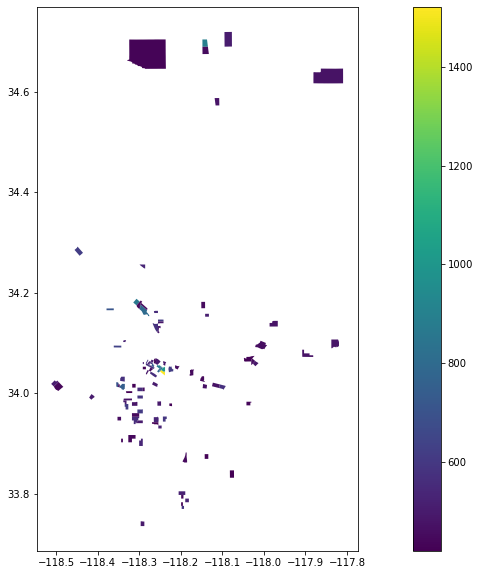

In [35]:
hh_sorted.head(100).plot(figsize=(20,10),column='No Internet access',legend=True)

Now that we have plotted the census tracts with the lowest adoptions rates, let's see where people making less than $10,000 and lack any internet access are located 

In [36]:
income_sorted=income_adoption.sort_values(by='Without an Internet subscription (1)', ascending = False)
income_sorted[['geoid', 'Without an Internet subscription (1)']].head(10)

,geoid,Without an Internet subscription (1)
537,14000US06037206300,1016.0
2188,14000US06037900701,335.0
536,14000US06037206200,319.0
1911,14000US06037575902,308.0
2195,14000US06037900806,284.0
542,14000US06037207302,280.0
209,14000US06037125320,276.0
541,14000US06037207301,257.0
85,14000US06037111400,239.0
821,14000US06037242600,237.0


<AxesSubplot:>

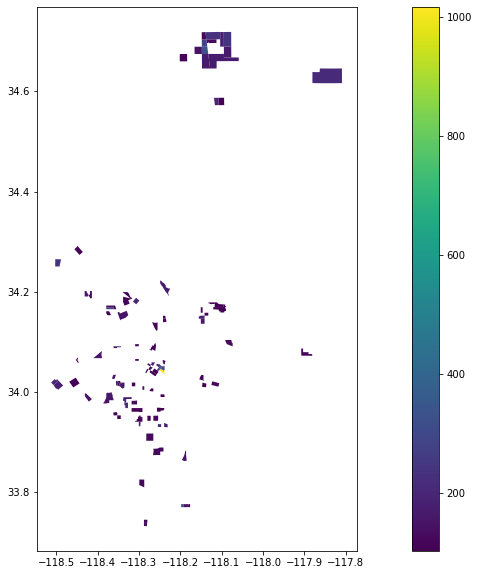

In [37]:
income_sorted.head(100).plot(figsize=(20,10), column='Without an Internet subscription (1)', legend=True)

While this has been helpful, it would be more helpful to normalize the data for a more direct comparison of census tracts

In [38]:
hh_adoption['Percent With an Internet subscription'] = hh_adoption['With an Internet subscription']/hh_adoption['Total']*100
hh_adoption['Percent Dial-up with no other type of Internet subscription'] = hh_adoption['Dial-up with no other type of Internet subscription']/hh_adoption['Total']*100
hh_adoption['Percent Broadband of any type'] = hh_adoption['Broadband of any type']/hh_adoption['Total']*100
hh_adoption['Cellular data plan'] = hh_adoption['Cellular data plan']/hh_adoption['Total']*100
hh_adoption['Percent Cellular data plan with no other type of Internet subscription'] = hh_adoption['Cellular data plan with no other type of Internet subscription']/hh_adoption['Total']*100
hh_adoption['Percent Broadband such as cable, fiber optic or DSL'] = hh_adoption['Broadband such as cable, fiber optic or DSL']/hh_adoption['Total']*100
hh_adoption['Percent Broadband such as cable, fiber optic or DSL with no other type of Internet subscription'] = hh_adoption['Broadband such as cable, fiber optic or DSL with no other type of Internet subscription']/hh_adoption['Total']*100
hh_adoption['Percent Satellite Internet service'] = hh_adoption['Satellite Internet service']/hh_adoption['Total']*100
hh_adoption['Percent Satellite Internet service with no other type of Internet subscription'] = hh_adoption['Satellite Internet service with no other type of Internet subscription']/hh_adoption['Total']*100
hh_adoption['Percent Other service with no other type of Internet subscription'] = hh_adoption['Other service with no other type of Internet subscription']/hh_adoption['Total']*100
hh_adoption['Percent Internet access without a subscription'] = hh_adoption['Internet access without a subscription']/hh_adoption['Total']*100
hh_adoption['Percent No Internet access'] = hh_adoption['No Internet access']/hh_adoption['Total']*100
hh_adoption.sample(5)

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,geoid,name,Total,With an Internet subscription,Dial-up with no other type of Internet subscription,Broadband of any type,Cellular data plan,Cellular data plan with no other type of Internet subscription,"Broadband such as cable, fiber optic or DSL","Broadband such as cable, fiber optic or DSL with no other type of Internet subscription",...,Percent Dial-up with no other type of Internet subscription,Percent Broadband of any type,Percent Cellular data plan with no other type of Internet subscription,"Percent Broadband such as cable, fiber optic or DSL","Percent Broadband such as cable, fiber optic or DSL with no other type of Internet subscription",Percent Satellite Internet service,Percent Satellite Internet service with no other type of Internet subscription,Percent Other service with no other type of Internet subscription,Percent Internet access without a subscription,Percent No Internet access
749,14000US06037234300,"Census Tract 2343, Los Angeles, CA",2276.0,1646.0,19.0,1627.0,58.655536,253.0,1305.0,292.0,...,0.834798,71.485062,11.115993,57.337434,12.829525,6.063269,0.000000,0.0,10.940246,16.739895
972,14000US06037296401,"Census Tract 2964.01, Los Angeles, CA",1268.0,1187.0,0.0,1187.0,77.365931,54.0,1081.0,203.0,...,0.000000,93.611987,4.258675,85.252366,16.009464,5.993691,0.000000,0.0,0.315457,6.072555
995,14000US06037300701,"Census Tract 3007.01, Los Angeles, CA",2076.0,1918.0,17.0,1901.0,75.915222,82.0,1799.0,325.0,...,0.818882,91.570328,3.949904,86.657033,15.655106,13.728324,0.000000,0.0,0.000000,7.610790
2230,14000US06037910505,"Census Tract 9105.05, Los Angeles, CA",814.0,743.0,0.0,743.0,72.727273,111.0,577.0,141.0,...,0.000000,91.277641,13.636364,70.884521,17.321867,9.090909,1.228501,0.0,1.965602,6.756757
1955,14000US06037600704,"Census Tract 6007.04, Los Angeles, CA",1215.0,920.0,0.0,920.0,62.551440,106.0,763.0,123.0,...,0.000000,75.720165,8.724280,62.798354,10.123457,10.699588,0.576132,0.0,7.818930,16.460905


We can now plot the normalized data for a better comparison

<AxesSubplot:>

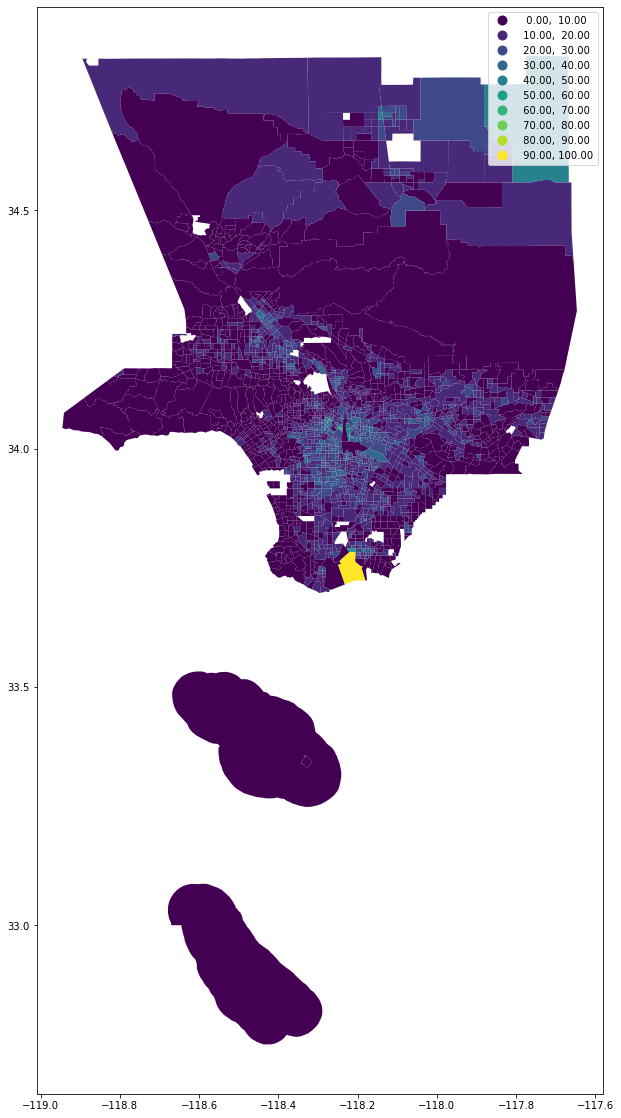

In [39]:
hh_adoption.plot(figsize=(20,20),
                 column='Percent No Internet access',
                 legend=True,
                 scheme='equal_interval', k=10)

<AxesSubplot:>

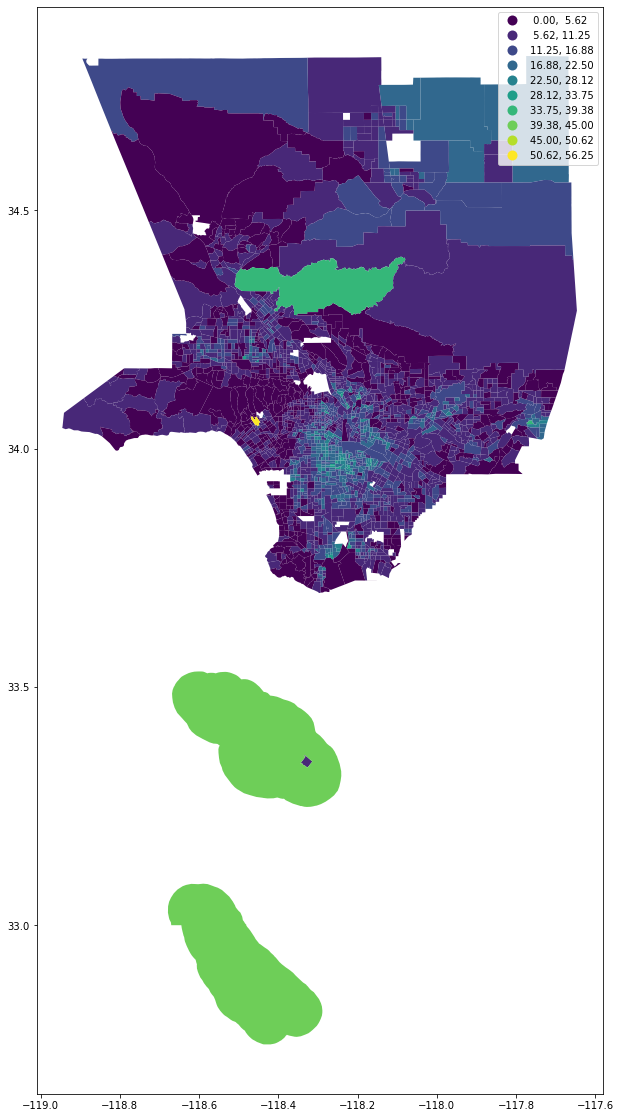

In [40]:
hh_adoption.plot(figsize=(20,20),
                 column='Percent Cellular data plan with no other type of Internet subscription',
                 legend=True,
                 scheme='equal_interval', k=10)

In [41]:
income_adoption['Percent Less than 10,000'] = income_adoption['Less than 10,000']/income_adoption['Total']*100
income_adoption['Percent With dial-up Internet subscription alone (1)'] = income_adoption['With dial-up Internet subscription alone (1)']/income_adoption['Less than 10,000']*100
income_adoption['Percent With a broadband Internet subscription (1)'] = income_adoption['With a broadband Internet subscription (1)']/income_adoption['Less than 10,000']*100
income_adoption['Percent Without an Internet subscription (1)'] = income_adoption['Without an Internet subscription (1)']/income_adoption['Less than 10,000']*100
income_adoption['Percent 10,000 to 19,999'] = income_adoption['10,000 to 19,999']/income_adoption['Total']*100
income_adoption['Percent With dial-up Internet subscription alone (2)'] = income_adoption['With dial-up Internet subscription alone (2)']/income_adoption['10,000 to 19,999']*100
income_adoption['Percent With a broadband Internet subscription (2)'] = income_adoption['With a broadband Internet subscription (2)']/income_adoption['10,000 to 19,999']*100
income_adoption['Percent Without an Internet subscription (2)'] = income_adoption['Without an Internet subscription (2)']/income_adoption['10,000 to 19,999']*100
income_adoption['Percent 20,000 to 34,999'] = income_adoption['20,000 to 34,999']/income_adoption['Total']*100
income_adoption['Percent With dial-up Internet subscription alone (3)'] = income_adoption['With dial-up Internet subscription alone (3)']/income_adoption['20,000 to 34,999']*100
income_adoption['Percent With a broadband Internet subscription (3)'] = income_adoption['With a broadband Internet subscription (3)']/income_adoption['20,000 to 34,999']*100
income_adoption['Percent Without an Internet subscription (3)'] = income_adoption['Without an Internet subscription (3)']/income_adoption['20,000 to 34,999']*100
income_adoption['Percent 35,000 to 49,999'] = income_adoption['35,000 to 49,999']/income_adoption['Total']*100
income_adoption['Percent With dial-up Internet subscription alone (4)'] = income_adoption['With dial-up Internet subscription alone (4)']/income_adoption['35,000 to 49,999']*100
income_adoption['Percent With a broadband Internet subscription (4)'] = income_adoption['With a broadband Internet subscription (4)']/income_adoption['35,000 to 49,999']*100
income_adoption['Percent Without an Internet subscription (4)'] = income_adoption['Without an Internet subscription (4)']/income_adoption['35,000 to 49,999']*100
income_adoption['Percent 50,000 to 74,999'] = income_adoption['50,000 to 74,999']/income_adoption['Total']*100
income_adoption['Percent With dial-up Internet subscription alone (5)'] = income_adoption['With dial-up Internet subscription alone (5)']/income_adoption['50,000 to 74,999']*100
income_adoption['Percent With a broadband Internet subscription (5)'] = income_adoption['With a broadband Internet subscription (5)']/income_adoption['50,000 to 74,999']*100
income_adoption['Percent Without an Internet subscription (5)'] = income_adoption['Without an Internet subscription (5)']/income_adoption['50,000 to 74,999']*100
income_adoption['Percent 75,000 or more'] = income_adoption['75,000 or more']/income_adoption['Total']*100
income_adoption['Percent With dial-up Internet subscription alone (6)'] = income_adoption['With dial-up Internet subscription alone (6)']/income_adoption['75,000 or more']*100
income_adoption['Percent With a broadband Internet subscription (6)'] = income_adoption['With a broadband Internet subscription (6)']/income_adoption['75,000 or more']*100
income_adoption['Percent Without an Internet subscription (6)'] = income_adoption['Without an Internet subscription (6)']/income_adoption['75,000 or more']*100
income_adoption.sample(5)

,geoid,name,Total,"Less than 10,000",With dial-up Internet subscription alone (1),With a broadband Internet subscription (1),Without an Internet subscription (1),"10,000 to 19,999",With dial-up Internet subscription alone (2),With a broadband Internet subscription (2),...,Percent With a broadband Internet subscription (4),Percent Without an Internet subscription (4),"Percent 50,000 to 74,999",Percent With dial-up Internet subscription alone (5),Percent With a broadband Internet subscription (5),Percent Without an Internet subscription (5),"Percent 75,000 or more",Percent With dial-up Internet subscription alone (6),Percent With a broadband Internet subscription (6),Percent Without an Internet subscription (6)
1470,14000US06037501400,"Census Tract 5014, Los Angeles, CA",1236.0,102.0,0.0,32.0,70.0,203.0,0.0,140.0,...,58.389262,41.610738,14.239482,0.0,87.500000,12.500000,33.090615,0.000000,95.843521,4.156479
2159,14000US06037800326,"Census Tract 8003.26, Los Angeles, CA",1832.0,34.0,0.0,25.0,9.0,61.0,0.0,43.0,...,100.000000,0.000000,12.609170,0.0,96.103896,3.896104,74.727074,2.118335,97.224251,0.657414
2009,14000US06037603200,"Census Tract 6032, Los Angeles, CA",1163.0,28.0,0.0,20.0,8.0,77.0,12.0,40.0,...,94.318182,5.681818,16.938951,0.0,100.000000,0.000000,54.170249,0.000000,98.253968,1.746032
1782,14000US06037554103,"Census Tract 5541.03, Los Angeles, CA",431.0,14.0,0.0,0.0,14.0,29.0,0.0,16.0,...,32.352941,67.647059,18.329466,0.0,93.670886,6.329114,54.524362,0.000000,95.744681,4.255319
1616,14000US06037534403,"Census Tract 5344.03, Los Angeles, CA",714.0,57.0,0.0,46.0,11.0,63.0,0.0,0.0,...,60.000000,40.000000,25.210084,0.0,92.777778,7.222222,21.288515,0.000000,73.684211,26.315789


<AxesSubplot:>

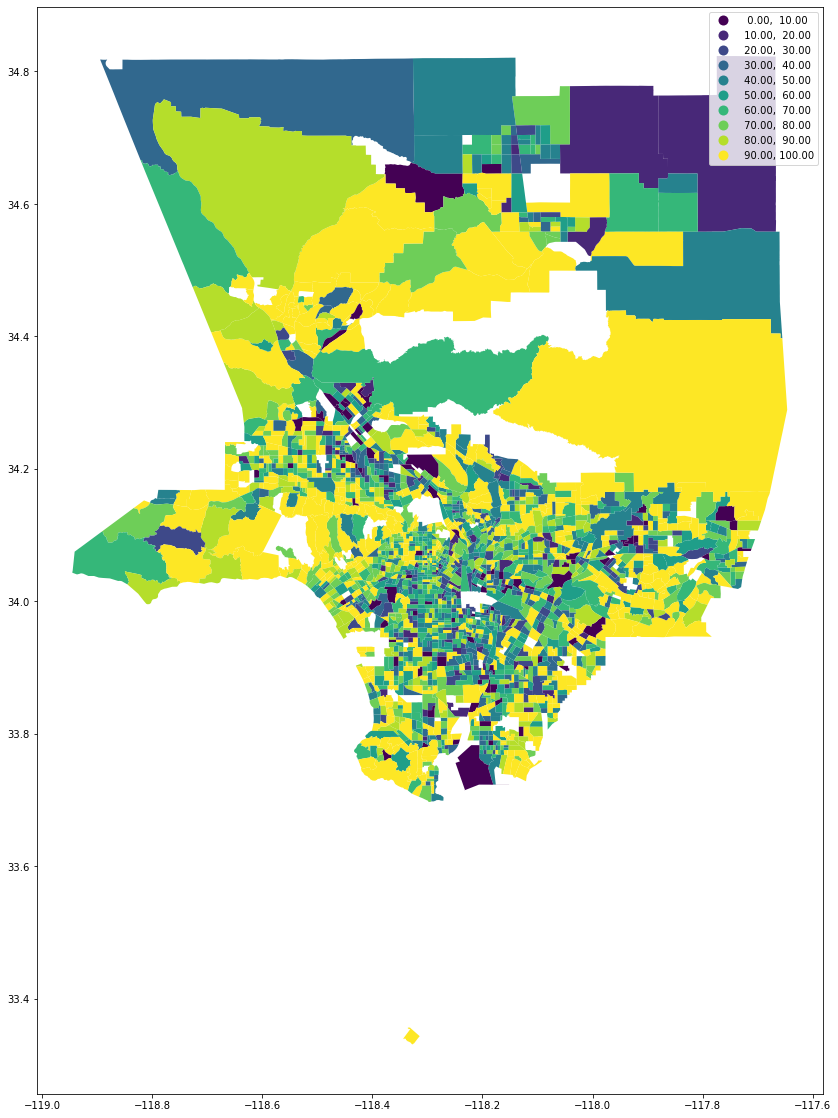

In [42]:
income_adoption.plot(figsize=(20,20),
                 column='Percent With a broadband Internet subscription (1)',
                 legend=True,
                 scheme='Equal_interval',k=10)

<AxesSubplot:>

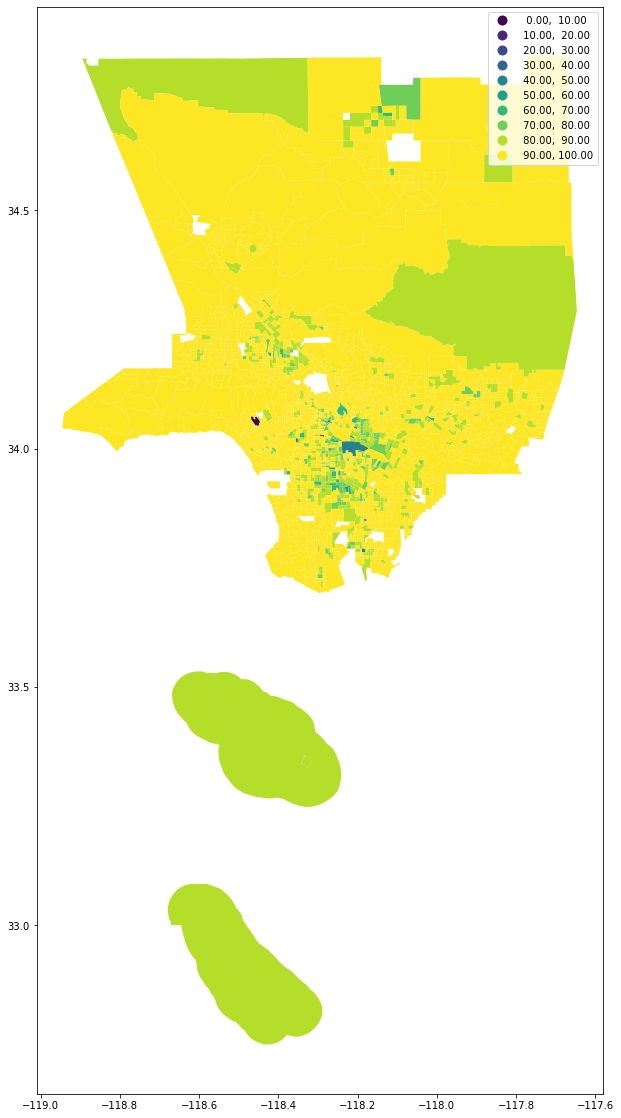

In [43]:
income_adoption.plot(figsize=(20,20),
                 column='Percent With a broadband Internet subscription (6)',
                 legend=True,
                 scheme='equal_interval', k=10)

Lets add a basemap to better understand in more detail

Text(0.5, 1.0, 'Percent with an income over $75,000 with a Broadband Internet Subcription')

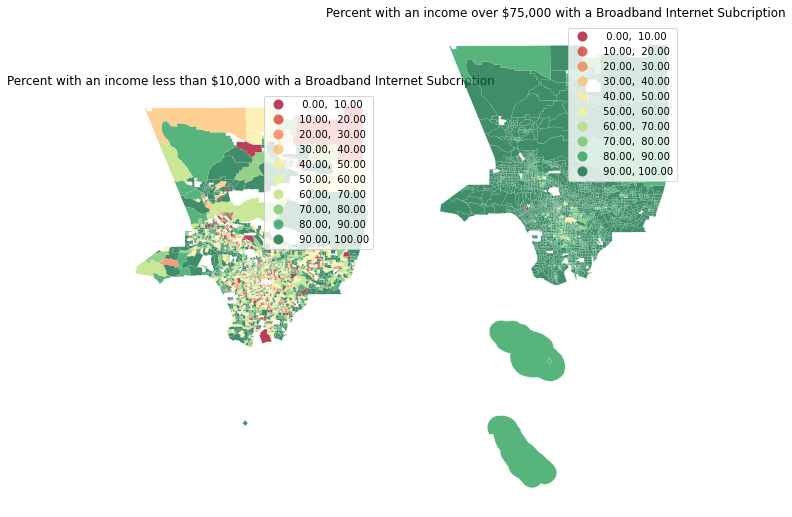

In [50]:
fig, axs = plt.subplots(1,2, figsize=(10, 10))
ax1, ax2 = axs
income_adoption.plot(column='Percent With a broadband Internet subscription (1)',
                        cmap='RdYlGn',
                        scheme='equal_interval',
                        k=10,
                        edgecolor='white',
                        linewidth=0.1,
                        alpha=0.75,
                        ax=ax1,
                        legend=True
                        )
ax1.axis("off")
ax1.set_title("Percent with an income less than $10,000 with a Broadband Internet Subcription")
                       
income_adoption.plot(column='Percent With a broadband Internet subscription (6)',
                    cmap='RdYlGn',
                    scheme='equal_interval',
                    k=10,
                    edgecolor='white',
                    linewidth=0.1,
                    alpha=0.75,
                    ax=ax2,
                    legend=True
                    )
ax2.axis("off")
ax2.set_title("Percent with an income over $75,000 with a Broadband Internet Subcription")

Now I will add a baselayer to a map of areas with 30% or more of residents who lack internet access at home.

In [54]:
#first identify the census tracts that have 30% or more of residents who lack access
hh_adoption[hh_adoption['Percent No Internet access'] >25]

,geoid,name,Total,With an Internet subscription,Dial-up with no other type of Internet subscription,Broadband of any type,Cellular data plan,Cellular data plan with no other type of Internet subscription,"Broadband such as cable, fiber optic or DSL","Broadband such as cable, fiber optic or DSL with no other type of Internet subscription",...,Percent Dial-up with no other type of Internet subscription,Percent Broadband of any type,Percent Cellular data plan with no other type of Internet subscription,"Percent Broadband such as cable, fiber optic or DSL","Percent Broadband such as cable, fiber optic or DSL with no other type of Internet subscription",Percent Satellite Internet service,Percent Satellite Internet service with no other type of Internet subscription,Percent Other service with no other type of Internet subscription,Percent Internet access without a subscription,Percent No Internet access
24,14000US06037104320,"Census Tract 1043.20, Los Angeles, CA",1331.0,915.0,0.0,915.0,61.607814,117.0,790.0,95.0,...,0.000000,68.745304,8.790383,59.353869,7.137491,1.126972,0.000000,0.00000,4.282494,26.972201
25,14000US06037104401,"Census Tract 1044.01, Los Angeles, CA",664.0,484.0,0.0,484.0,65.963855,88.0,391.0,36.0,...,0.000000,72.891566,13.253012,58.885542,5.421687,7.228916,0.753012,0.00000,1.656627,25.451807
27,14000US06037104404,"Census Tract 1044.04, Los Angeles, CA",678.0,500.0,0.0,500.0,67.404130,69.0,413.0,43.0,...,0.000000,73.746313,10.176991,60.914454,6.342183,14.011799,0.000000,0.00000,0.000000,26.253687
29,14000US06037104610,"Census Tract 1046.10, Los Angeles, CA",703.0,515.0,0.0,515.0,61.024182,60.0,410.0,74.0,...,0.000000,73.257468,8.534851,58.321479,10.526316,5.120910,0.000000,1.70697,1.422475,25.320057
31,14000US06037104701,"Census Tract 1047.01, Los Angeles, CA",926.0,624.0,0.0,624.0,54.643629,107.0,471.0,108.0,...,0.000000,67.386609,11.555076,50.863931,11.663067,8.315335,1.079914,0.00000,2.591793,30.021598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,14000US06037900701,"Census Tract 9007.01, Los Angeles, CA",1715.0,1179.0,36.0,1143.0,40.758017,169.0,966.0,427.0,...,2.099125,66.647230,9.854227,56.326531,24.897959,3.848397,0.000000,0.00000,4.897959,26.355685
2193,14000US06037900804,"Census Tract 9008.04, Los Angeles, CA",1071.0,603.0,0.0,603.0,37.441643,92.0,502.0,202.0,...,0.000000,56.302521,8.590103,46.872082,18.860878,3.267974,0.000000,0.00000,5.602241,38.095238
2195,14000US06037900806,"Census Tract 9008.06, Los Angeles, CA",2029.0,1041.0,8.0,1033.0,24.593396,131.0,856.0,449.0,...,0.394283,50.911779,6.456382,42.188270,22.129128,5.766387,0.739280,0.00000,4.682109,44.011828
2327,14000US06037980010,"Census Tract 9800.10, Los Angeles, CA",56.0,36.0,4.0,32.0,46.428571,6.0,26.0,6.0,...,7.142857,57.142857,10.714286,46.428571,10.714286,0.000000,0.000000,0.00000,7.142857,28.571429


<AxesSubplot:>

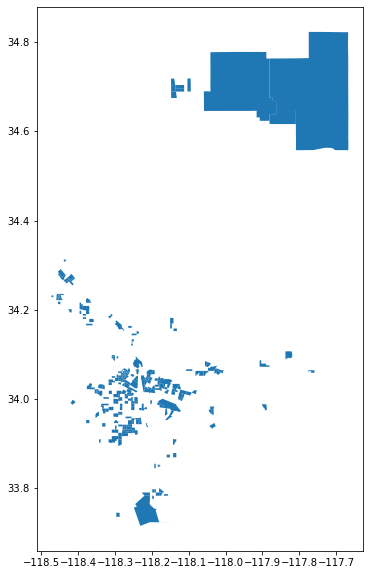

In [55]:
hh_adoption[hh_adoption['Percent No Internet access'] > 25].plot(figsize=(12,10))

In [56]:
#Next, I will add the basemap 
hh_web_mercator = hh_adoption.to_crs(epsg=3857)

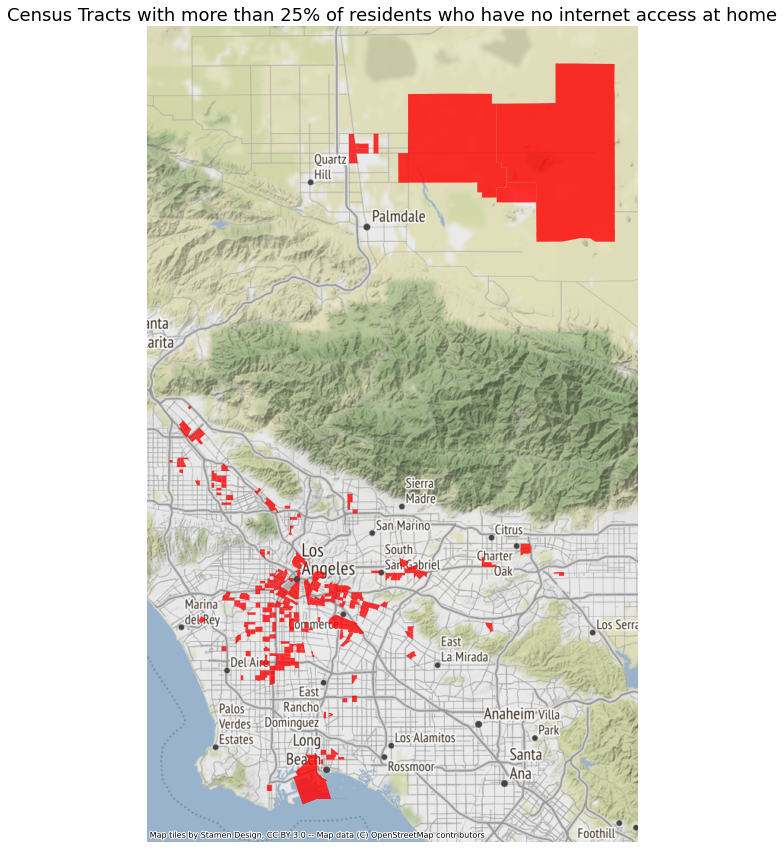

In [74]:
fig, ax = plt.subplots(figsize=(15, 15))
hh_web_mercator[hh_web_mercator['Percent No Internet access'] > 25].plot(ax=ax, alpha=0.8, color='red')
ax.axis('off')
ax.set_title('Census Tracts with more than 25% of residents who have no internet access at home', fontsize=18)
ctx.add_basemap(ax)

Now I will bring it all together...

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)
/opt/conda/lib/python3.9/site-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


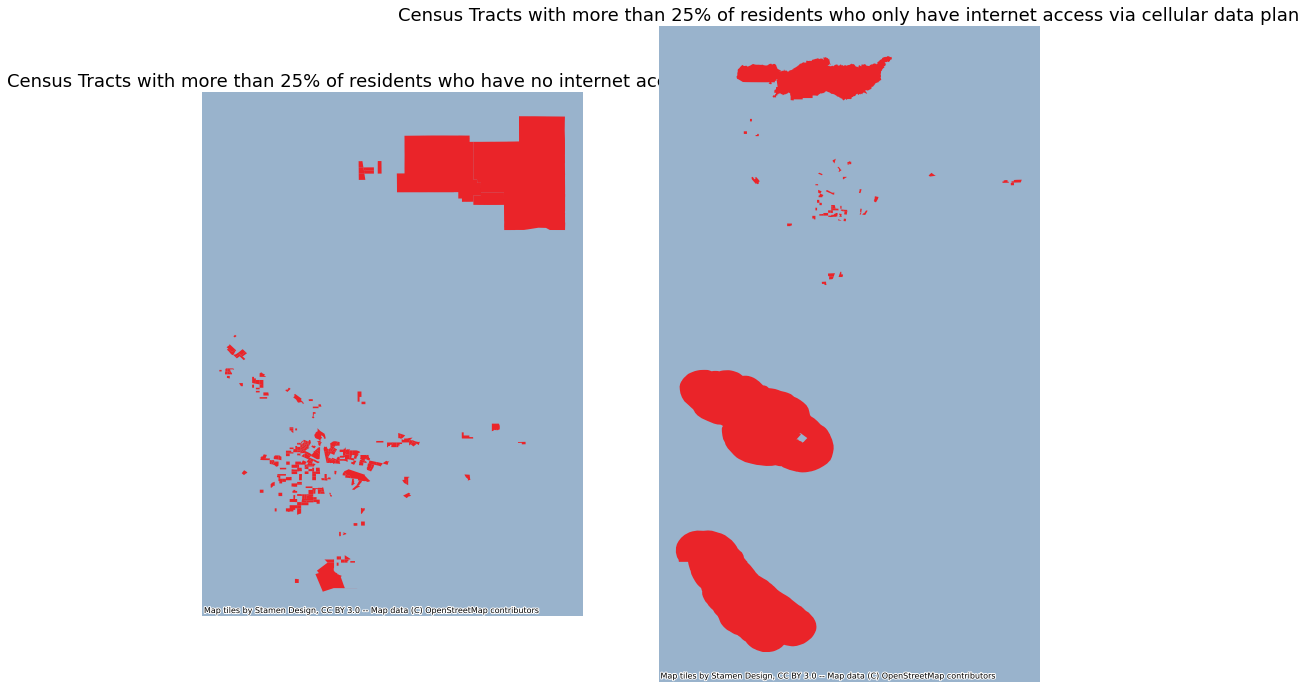

In [77]:
hh_web_mercator = hh_adoption.to_crs(epsg=3857)
fig, axs = plt.subplots(1,2, figsize=(15, 15,))
ax1, ax2 = axs
hh_adoption[hh_adoption['Percent No Internet access'] > 25].plot(ax=ax1, alpha=0.8, color='red')
ax1.axis('off')
ax1.set_title('Census Tracts with more than 25% of residents who have no internet access at home', fontsize=18)
ctx.add_basemap(ax1)

hh_adoption[hh_adoption['Percent Cellular data plan with no other type of Internet subscription'] > 25].plot(ax=ax2, alpha=0.8, color='red')
ax2.axis('off')
ax2.set_title('Census Tracts with more than 25% of residents who only have internet access via cellular data plan', fontsize=18)
ctx.add_basemap(ax2)